# Exploratory_Data_Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/aggar/Downloads/Data_Set.csv", index_col=0)            # index_col = 0 means setting column which
                                                                                  # is used as the index of the dataframe.

In [3]:
df

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(158, 9)

## Dropping Duplicate Rows and Columns

In [6]:
df1 = df.copy()                                            # making a copy of original data, so that original will not effect.

In [7]:
df1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [8]:
df1.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [9]:
df1[df1.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [10]:
df1 = df1.drop_duplicates()

In [11]:
df1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68,9,30,2010,68,S
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S


In [12]:
df1 = df1.drop('Temp C', axis = 1)

In [13]:
df1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,S
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S


## Renaming Columns

In [14]:
df1 = df1.rename({"Solar.R":"Solar"}, axis = 1)

In [15]:
df1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,S
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S


## Datatype Conversion

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar    150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    object 
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 11.0+ KB


In [17]:
df1['Month'] = pd.to_numeric(df1['Month'], errors = 'coerce')            # Changing type according to built in identification 
df1['Weather'] = df1['Weather'].astype('category')                       # Changing type according to user identification

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


## Outliers Detection

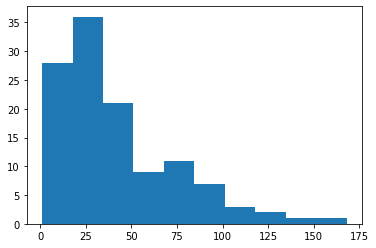

In [19]:
plt.hist(df1['Ozone'])                                                     # Histogram to check outliers
plt.show()

C:\Users\aggar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


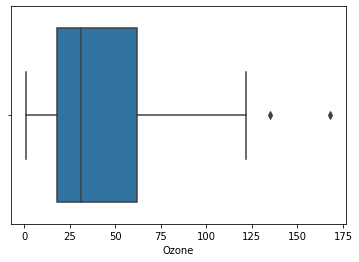

In [20]:
sns.boxplot(df1['Ozone'])                                                 # BoxPlot to check outliers 
plt.show()

In [21]:
df1.describe()                                                            # Descriptive statistics to check outliers

,Ozone,Solar,Wind,Month,Day,Year,Temp
count,119.000000,150.000000,157.000000,156.000000,157.000000,157.0,157.000000
mean,41.815126,185.366667,9.929936,7.032051,15.929936,2010.0,77.745223
std,32.659249,89.019146,3.505188,1.429730,8.974404,0.0,9.405334
min,1.000000,7.000000,1.700000,5.000000,1.000000,2010.0,56.000000
25%,18.000000,118.500000,7.400000,6.000000,8.000000,2010.0,72.000000
50%,31.000000,199.000000,9.700000,7.000000,16.000000,2010.0,79.000000
75%,62.000000,257.500000,11.500000,8.000000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,9.000000,31.000000,2010.0,97.000000


## Missing Values and Imputation

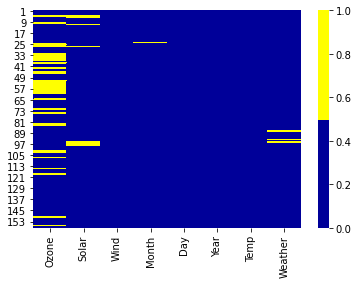

In [22]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1.iloc[:,:].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [23]:
df1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [24]:
df1[df1.isnull().any(axis=1)]

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C
25,NaN,66.0,16.6,5.0,25,2010,57,PS
26,NaN,266.0,14.9,5.0,26,2010,58,C
27,NaN,NaN,8.0,5.0,27,2010,57,PS
32,NaN,286.0,8.6,6.0,1,2010,78,S
33,NaN,287.0,9.7,6.0,2,2010,74,C


In [25]:
df1[df1.isnull().any(axis=1)].shape

(46, 8)

In [26]:
meanOzone = df1['Ozone'].mean()
meanOzone

41.81512605042017

In [27]:
df1['Ozone'] = df1['Ozone'].fillna(meanOzone)

In [28]:
meanSolar = df1['Solar'].mean()
meanSolar

185.36666666666667

In [29]:
df1['Solar'] = df1['Solar'].fillna(meanSolar)

In [30]:
modeWeather = df1['Weather'].mode()
modeWeather

0    S
Name: Weather, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [31]:
df1['Weather'] = df1['Weather'].fillna(modeWeather)

## Scatter Plot and Correlation Analysis

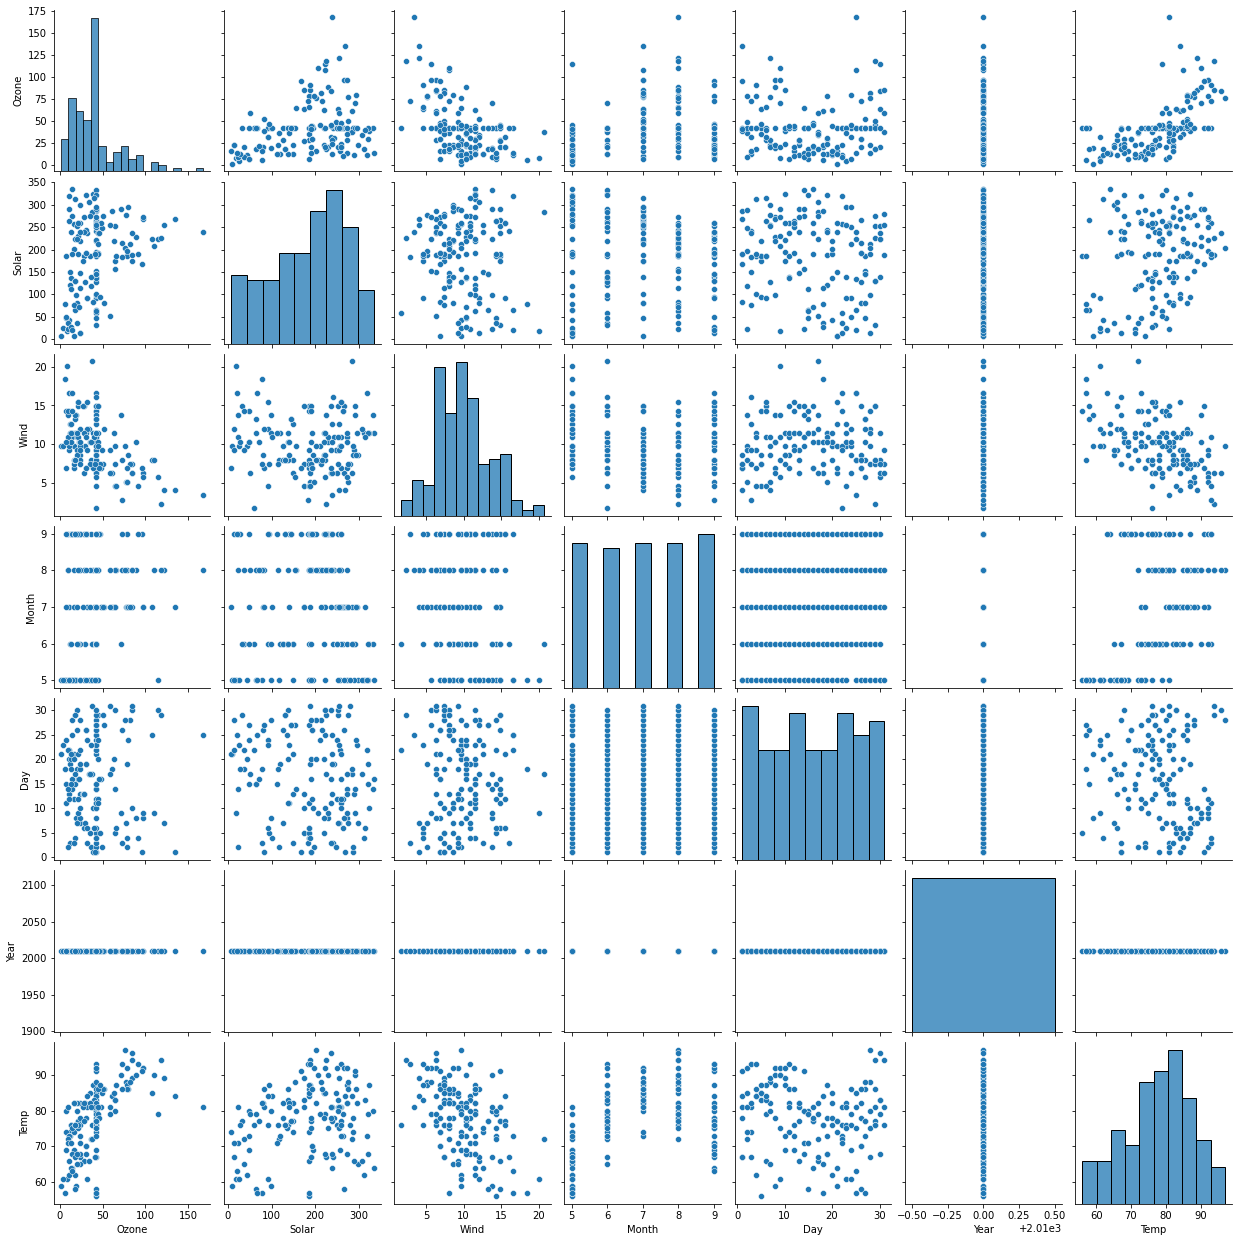

In [32]:
# ScatterPlot
sns.pairplot(df1)
plt.show()

In [33]:
# Correalation
df1.corr()

,Ozone,Solar,Wind,Month,Day,Year,Temp
Ozone,1.000000,0.304559,-0.520004,0.132860,-0.021916,NaN,0.606500
Solar,0.304559,1.000000,-0.055874,-0.090902,-0.151007,NaN,0.260677
Wind,-0.520004,-0.055874,1.000000,-0.166216,0.029900,NaN,-0.441228
Month,0.132860,-0.090902,-0.166216,1.000000,0.050055,NaN,0.398516
Day,-0.021916,-0.151007,0.029900,0.050055,1.000000,NaN,-0.122787
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606500,0.260677,-0.441228,0.398516,-0.122787,NaN,1.000000


## Transformations

In [34]:
df1 = pd.get_dummies(df1, columns = ['Weather'])

In [35]:
df1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
2,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
3,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
4,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
5,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
154,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
155,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
156,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


In [36]:
df1 = df1.dropna()

In [37]:
df1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.000000,190.000000,7.4,5.0,1,2010,67,0,0,1
2,36.000000,118.000000,8.0,5.0,2,2010,72,1,0,0
3,12.000000,149.000000,12.6,5.0,3,2010,74,0,1,0
4,18.000000,313.000000,11.5,5.0,4,2010,62,0,0,1
5,41.815126,185.366667,14.3,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...
153,20.000000,223.000000,11.5,9.0,30,2010,68,0,0,1
154,41.000000,190.000000,7.4,5.0,1,2010,67,1,0,0
155,30.000000,193.000000,6.9,9.0,26,2010,70,0,1,0
156,41.815126,145.000000,13.2,9.0,27,2010,77,0,0,1


### Normalization

In [38]:
array = df1.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)
normData = pd.DataFrame(rescaledX)
normData

,0,1,2,3,4,5,6,7,8,9
0,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,0.0,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.033333,0.0,0.390244,1.0,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.066667,0.0,0.439024,0.0,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.100000,0.0,0.146341,0.0,0.0,1.0
4,0.244402,0.545464,0.663158,0.0,0.133333,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
151,0.113772,0.660550,0.515789,1.0,0.966667,0.0,0.292683,0.0,0.0,1.0
152,0.239521,0.559633,0.300000,0.0,0.000000,0.0,0.268293,1.0,0.0,0.0
153,0.173653,0.568807,0.273684,1.0,0.833333,0.0,0.341463,0.0,1.0,0.0
154,0.244402,0.422018,0.605263,1.0,0.866667,0.0,0.512195,0.0,0.0,1.0


### Standardization

In [39]:
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)
standData = pd.DataFrame(rescaledX)
standData

,0,1,2,3,4,5,6,7,8,9
0,-0.030924,0.046551,-0.718793,-1.425861,-1.662190,0.0,-1.165855,-0.666667,-0.656653,1.299867
1,-0.207021,-0.784136,-0.547425,-1.425861,-1.550470,0.0,-0.628722,1.500000,-0.656653,-0.769309
2,-1.052288,-0.426479,0.766395,-1.425861,-1.438750,0.0,-0.413868,-0.666667,1.522875,-0.769309
3,-0.840971,1.465642,0.452220,-1.425861,-1.327031,0.0,-1.702989,-0.666667,-0.656653,1.299867
4,-0.002216,-0.006905,1.251937,-1.425861,-1.215311,0.0,-2.347550,-0.666667,-0.656653,1.299867
...,...,...,...,...,...,...,...,...,...,...
151,-0.770532,0.427283,0.452220,1.380881,1.577684,0.0,-1.058429,-0.666667,-0.656653,1.299867
152,-0.030924,0.046551,-0.718793,-1.425861,-1.662190,0.0,-1.165855,1.500000,-0.656653,-0.769309
153,-0.418338,0.081163,-0.861599,1.380881,1.130805,0.0,-0.843575,-0.666667,1.522875,-0.769309
154,-0.002216,-0.472629,0.937762,1.380881,1.242525,0.0,-0.091588,-0.666667,-0.656653,1.299867


## Automatic EDA (Speed up the EDA process)

In [40]:
pip install pandas_profiling

In [41]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas_profiling as pp
import sweetviz as sv

In [43]:
EDA_report= pp.ProfileReport(df1)
EDA_report.to_file(output_file="Report.html")

In [44]:
Sweet_Report = sv.analyze(df1)
Sweet_Report.show_html("Weather_Report.html")


Report Weather_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
